# OpenCV: Computer Vision with Python
---

### Introduction
---

OpenCV (Open Source Computer Vision Library) is an open-source computer vision and machine learning software library. It has over 2500
optimized algorithms for real-time image and video processing.

### Installation
Install OpenCV using

In [ ]:
pip install opencv-python 

## Basic Imports

In [26]:
import cv2

In [27]:
import numpy as np

In [28]:
import matplotlib.pyplot as plt

## 1. Read the Image

In [14]:
# Load image
image = cv2.imread("dog1.jpg")

if image is None:
    print("Image not found, Check image path and name , correct this.")
else:
    print("Image Loaded Successfully.")
    print(f"Image type : {type(image)}")

Image Loaded Successfully.
Image type : <class 'numpy.ndarray'>


# 2. Display the image

OpenCV reads images in **BGR** (Blue, Green, Red).
<br>
Matplotlib shows images in **RGB** (Red, Green, Blue).

So we convert **BGR → RGB** before showing.

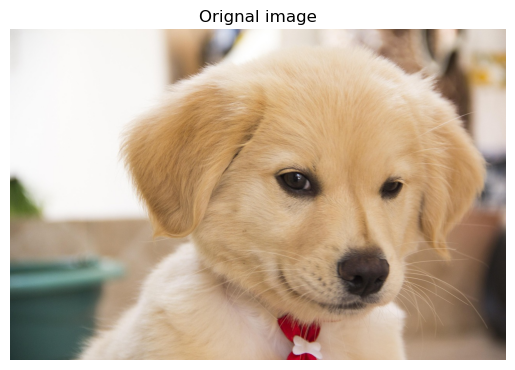

In [15]:
if image is not None:
    img_rgb = cv2.cvtColor(image , cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.axis("off")
    plt.title("Orignal image")
    plt.show()

# 3. Understand image size (shape)

`img.shape` returns:
- **Height** (How tall)
- **Width** (How wide)
- **Channels** (Colors)

For a color image: 

- channel = **3** (R , G , B) 

For grayscale image:

- channels = **1**

In [16]:
if image is not None:
    h , w , c = image.shape
    print("Height:", h)
    print("Width :", w)
    print("Channels:", c)

Height: 853
Width : 1280
Channels: 3


# 4. Pixels are numbers
A pixel is a tiny dot.

- In color image : each pixel has **3 numbers** (R, G , B)
- Example : `[12 , 200 , 30]`

Let's print the first pixel (top-Level).

In [18]:
if image is not None:
    print("Top left pixel : " , image[1,1])

Top left pixel :  [216 218 219]


# 5. Convert to Grayscale (Black & White)

Why it matters:

- It is simpler for the computer
- Many CV tasks start with grayscale

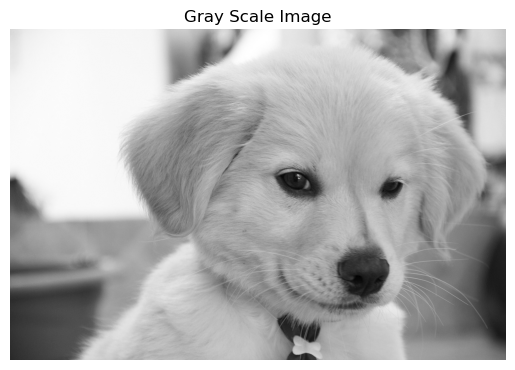

In [19]:
if image is not None:
    gray = cv2.cvtColor(image , cv2.COLOR_BGR2GRAY)
    plt.imshow(gray , cmap="gray")
    plt.axis("off")
    plt.title("Gray Scale Image")
    plt.show()

# 6. Resize the image
Why resize?

- Smaller image = faster processing
- In AI models, input size is usually fixed (example: 640×640)

We will resize to 300×300

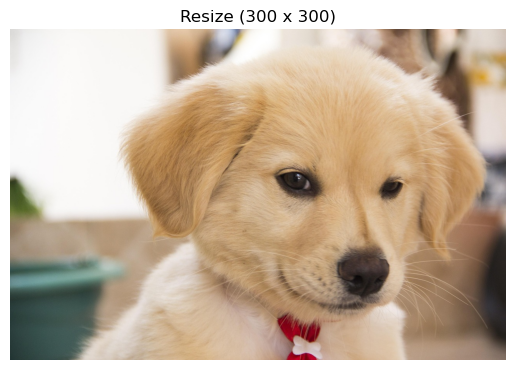

In [22]:
if image is not None:
    resize = cv2.resize(image , (300 , 300))
    resize_rgb = cv2.cvtColor(image , cv2.COLOR_BGR2RGB)
    plt.imshow(resize_rgb)
    plt.axis("off")
    plt.title("Resize (300 x 300)")
    plt.show()

# 7.Blur (make image smooth)

**Blurring** is an image preprocessing step used in Machine Learning and Computer Vision to **smooth an image and reduce noise** (tiny unwanted details).

### What does blur do?

* It softens sharp edges
* It removes small dots, grain, or random pixels (noise)
* It makes important shapes easier for the model to understand

### Simple analogy:

> Blurring is like **looking through slightly foggy glass** — small details disappear, but the main objects are still visible.

### Why blur is used in ML:

* Reduces noise that can confuse the model
* Improves edge detection and feature extraction
* Helps models focus on **important patterns**, not tiny distractions
---


```python
blur = cv2.GaussianBlur(image, (15, 15), 0)
```

## What this line does (BIG IDEA)

This line **smooths the image** by applying a **Gaussian Blur**,
which **removes noise and tiny details**.

## Parameter-by-Parameter Explanation

### **1 `image`**

- Input image

### **2️ `(15, 15)` → Kernel Size**

- Blur **strength / area**

| Value | Meaning         |
| ----- | --------------- |
| 15×15 | Large blur      |
| 5×5   | Light blur      |
| 3×3   | Very small blur |

 **Rule:**

* Numbers must be **odd**  
* Bigger kernel = more smooth image

🧠 *15×15 ka matlab: har pixel apne 15×15 neighbors ka average lega*


### **3️ `0` → SigmaX**

- Gaussian distribution ka standard deviation
- `0` ka matlab:

> OpenCV khud calculate karega based on kernel size

Easy & recommended for beginners

## Simple Analogy

> Image ko aise blur karna
> jaise thori fog aa jaye —
> sharp edges soft ho jati hain


## Why Gaussian Blur is important in ML / CV

- Noise remove
- False edges kam
- Better edge detection
- Stable feature extraction

Is liye **Canny se pehle blur** lagate hain

## ONE-LINE

> `cv2.GaussianBlur(image, (15,15), 0)` applies Gaussian smoothing to an image using a 15×15 kernel to reduce noise and small details.


## Memory Trick

> **Big kernel → More blur**
<br>
> **0 sigma → Auto calculation**


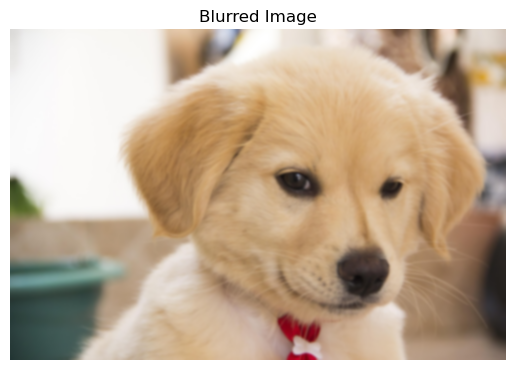

In [25]:
if image is not None:
    blur = cv2.GaussianBlur(image , (15, 15) , 0)
    blur_rgb = cv2.cvtColor(blur , cv2.COLOR_BGR2RGB)

    plt.imshow(blur_rgb)
    plt.axis("off")
    plt.title("Blurred Image")
    plt.show()

# 8. Edge Detection (WOW moment)

Edges are the **boundaries** of objects.
<br>
Edge detection is used in:

- security cameras
- defect detection
- medical scans
- self-driving

We use **Canny** edges.

`edges = cv2.Canny(gray, 100, 200)`

This line **detects edges** in an image using the **Canny Edge Detection** algorithm.

### What is happening?

* `cv2.Canny()` → OpenCV function for **edge detection**
* `gray` → **grayscale image**
  (Canny works on gray images, not color)
* `100` → **lower threshold**
* `200` → **upper threshold**
* `edges` → output image showing **only edges** (white lines on black background)

---

### Thresholds explained (MOST IMPORTANT)

| Value        | Meaning               |
| ------------ | --------------------- |
| `100` (low)  | Weak edges start      |
| `200` (high) | Strong edges accepted |

Pixels with:

* gradient > 200 → **definitely an edge**
* gradient < 100 → **not an edge**
* between 100–200 → edge only if connected to strong edge

### Simple analogy:

> Like outlining objects with a pencil — only the **boundaries** are drawn, everything else is ignored.


### Why we use Canny in ML / CV:

* Detect object boundaries
* Shape detection
* Preprocessing for object recognition


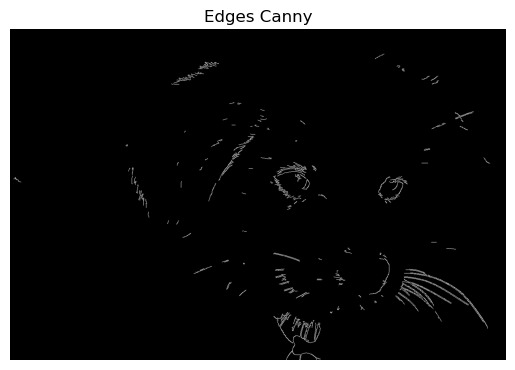

In [12]:
if gray is not None:
    edges = cv2.Canny(gray , 100 , 200)

    plt.imshow(edges , cmap="gray")
    plt.axis("off")
    plt.title("Edges Canny")
    plt.show()

# 9. Save the processed images

We will save: 

- grayscale
- resize
- blurred
- edges

They will be saved in the same folder as your notebook (or wherever you run it).

In [1]:
import os

In [17]:
if image is not None:
    out_dir = "OpenCV/outputs"
    os.makedirs(out_dir , exist_ok = True)

    cv2.imwrite(os.path.join(out_dir , "1_gray.jpg") , gray)
    cv2.imwrite(os.path.join(out_dir , "2_resized.jpg") , resize)
    cv2.imwrite(os.path.join(out_dir , "3_blur.jpg") , blur)
    cv2.imwrite(os.path.join(out_dir , "4_edges.jpg") , edges)

    print("Saved outputs in folder : " , out_dir)

Saved outputs in folder :  OpenCV/outputs


# **Mini Practice**

1. Load another image
2. Convert to grayscale
3. Resize to 200×200
4. Apply blur
5. Show edges
6. Save outputs

Goal: You can do it without copying from me.

In [21]:
import cv2
import matplotlib.pyplot as plt
# Load image 

img = cv2.imread("OpenCV/dog.jpg")

if img is None:
    print("Image is not found , check the image name and path , correct it.")
else:
    print("Image is loaded successfully.")
    print("Image type" , type(img))

Image is loaded successfully.
Image type <class 'numpy.ndarray'>


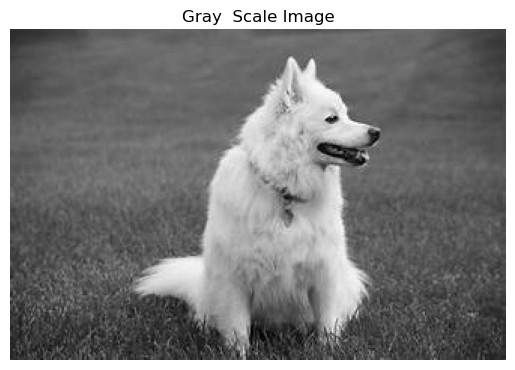

In [23]:
# covert to grayscale
if img is not None:
    gray = cv2.cvtColor(img , cv2.COLOR_BGR2GRAY)

    plt.imshow(gray  , cmap="gray")
    plt.axis("off")
    plt.title("Gray  Scale Image")

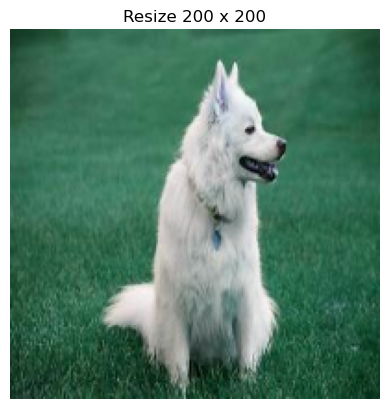

In [26]:
# Resize to 200 x 200

if img is not None:
    resized = cv2.resize(img , (200 , 200))
    resized_rgb = cv2.cvtColor(resized , cv2.COLOR_BGR2RGB)

    plt.imshow(resized)
    plt.axis("off")
    plt.title("Resize 200 x 200")
    plt.show()

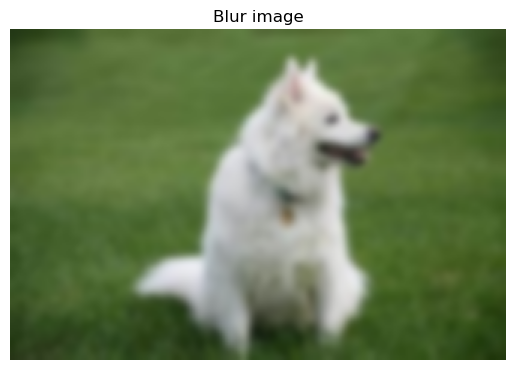

In [27]:
# Blur the image

if img is not None:
    blur = cv2.GaussianBlur(img , (15,15) , 0)
    blur_rgb = cv2.cvtColor(blur , cv2.COLOR_BGR2RGB)

    plt.imshow(blur_rgb)
    plt.axis("off")
    plt.title("Blur image")
    plt.show()

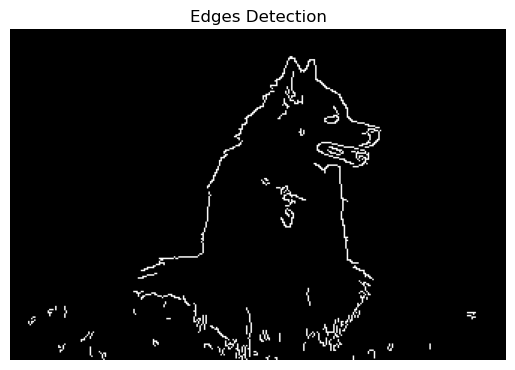

In [34]:
# Show adges

if gray is not None:
    edges = cv2.Canny(gray , 200 , 350)

    plt.imshow(edges , cmap="gray")
    plt.axis("off")
    plt.title("Edges Detection")
    plt.show()

In [36]:
# Saves Output

import os

if img is not None:
    out_dir = "OpenCV/project_1_outputs"

    os.makedirs(out_dir , exist_ok=True)

    cv2.imwrite(os.path.join(out_dir, "1_gray.jpg"), gray)
    cv2.imwrite(os.path.join(out_dir, "2_resized.jpg"), resized)
    cv2.imwrite(os.path.join(out_dir, "3_blur.jpg"), blur)
    cv2.imwrite(os.path.join(out_dir, "4_edges.jpg"), edges)

    print("Saved outputs in folder : " , out_dir)

Saved outputs in folder :  OpenCV/project_1_outputs


# Summary

* `cv2.imread(path)` → load image from file
* `cv2.cvtColor(img, cv2.COLOR_BGR2RGB)` → fix colors for Matplotlib display
* `img.shape` → get image size (Height, Width, Channels)
* `cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)` → convert to grayscale
* `cv2.resize(img, (w, h))` → change image size
* `cv2.GaussianBlur(img, (k, k), 0)` → smooth / blur image
* `cv2.Canny(gray, t1, t2)` → detect edges
* `cv2.imwrite("name.jpg", img)` → save image to disk
